In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

data = pd.read_csv("CC GENERAL.csv")

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
features = list(data.columns)
n_features = len(features)
n_samples = len(data)

print(f"Number of features : {n_features}")
print(f"Number of Samples  : {n_samples}")
print("Features  : ")
for index, feature in enumerate(features):
    print(f"{index+1:2}. {feature}")

Number of features : 18
Number of Samples  : 8950
Features  : 
 1. CUST_ID
 2. BALANCE
 3. BALANCE_FREQUENCY
 4. PURCHASES
 5. ONEOFF_PURCHASES
 6. INSTALLMENTS_PURCHASES
 7. CASH_ADVANCE
 8. PURCHASES_FREQUENCY
 9. ONEOFF_PURCHASES_FREQUENCY
10. PURCHASES_INSTALLMENTS_FREQUENCY
11. CASH_ADVANCE_FREQUENCY
12. CASH_ADVANCE_TRX
13. PURCHASES_TRX
14. CREDIT_LIMIT
15. PAYMENTS
16. MINIMUM_PAYMENTS
17. PRC_FULL_PAYMENT
18. TENURE


In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
simple_imputer = SimpleImputer(strategy="mean")
data.MINIMUM_PAYMENTS = simple_imputer.fit_transform(data.MINIMUM_PAYMENTS.to_numpy().reshape(-1,1))

# Confirmation of the Imputation
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
data_copy = data.copy()
data_copy.drop(columns = 'CUST_ID', inplace = True)

In [8]:
norm_data = normalize(data_copy)

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(norm_data)

# Final dataset
scaled_data

array([[-0.9418589 ,  2.51351895, -0.36811698, ..., -0.02637805,
        -0.38761659,  3.01516256],
       [ 0.22152701, -0.74991997, -0.92500711, ..., -0.25090963,
        -0.20776637, -0.79553516],
       [ 0.29887531, -0.55916806, -0.34071246, ..., -0.37793698,
        -0.38761659, -0.65195208],
       ...,
       [-1.01764362,  2.62400729, -0.0723584 , ..., -0.36490662,
         1.75829814,  0.93323231],
       [-1.00049826,  6.47911281, -0.92500711, ..., -0.17891966,
         3.95805132,  3.11721441],
       [-0.26970397,  0.40931793,  2.39229148, ..., -0.59088656,
        -0.38761659, -0.10245973]])

In [10]:
def hist(feature, data_frame):
   
    fig = px.histogram(
        data_frame=data_frame,
        x=feature,
        title="{} Histogram".format(feature.title()),
        text_auto=True,
        marginal="rug",
        height=500
    )
    fig.show()

def box(feature, data_frame):
   
    fig = px.box(
        data_frame=data_frame,
        x=feature,
        title="{} Box Plot".format(feature.title()),
        notched=True,
        height=500
    )
    fig.show()


def violin(feature, data_frame):
   
    fig = px.violin(
        data_frame=data_frame,
        x=feature,
        title="{} Violin Plot".format(feature.title()),
        height=500,
    )
    fig.show()


def feature_analysis(index, data_frame = data):
    
    hist(features[index], data_frame)
    box(features[index], data_frame)
    violin(features[index], data_frame)

In [11]:
feature_analysis(1)

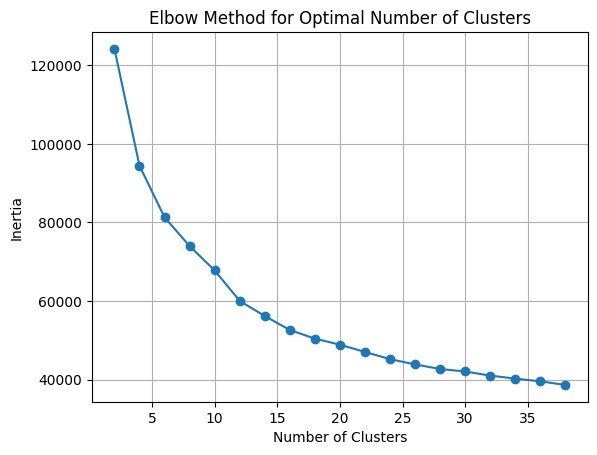

In [12]:
num_clusters_range = range(2, 40, 2)

inertia_values = []


for num_clusters in num_clusters_range:
    k_means = KMeans(
        n_clusters = num_clusters,
        random_state = 42,
        n_init = "auto"
    )
    k_means.fit(scaled_data)
    inertia_values.append(k_means.inertia_)

plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

c:\Users\Casper\OneDrive\Masaüstü\data\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


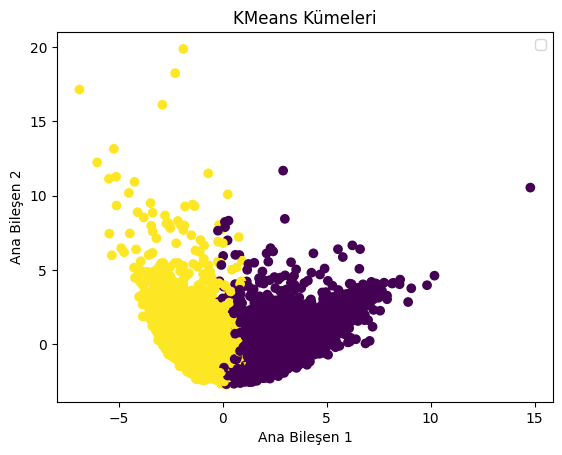

In [ ]:
opt_model = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels = opt_model.fit_predict(scaled_data)

pca = PCA(n_components=2)
df_2d = pca.fit_transform(scaled_data)

plt.figure()
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Kümeleri')
plt.xlabel('Ana Bileşen 1')
plt.ylabel('Ana Bileşen 2')
plt.legend()
plt.show()